In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
import numpy as np
import matplotlib as mpl
from pandas import DataFrame
%matplotlib notebook
%precision 2

'%.2f'

C:\Users\Pradyumna Bada\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<IPython.core.display.Javascript object>


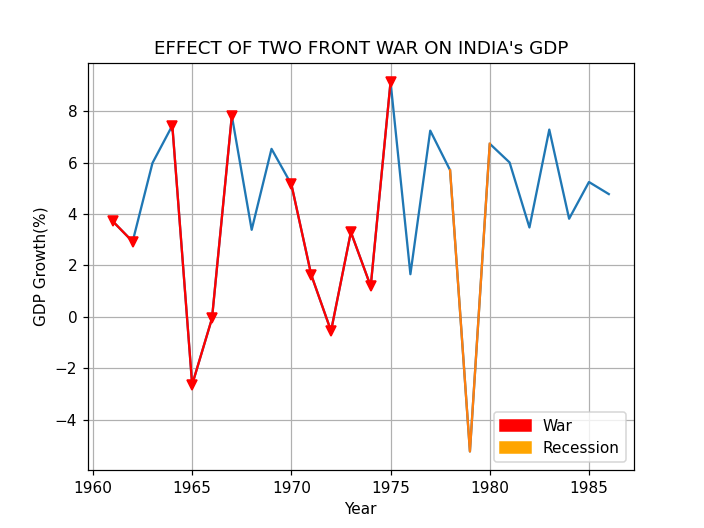

In [16]:
df2=pd.read_csv('Gdp_world.csv')
groups=df2.groupby('Series Name')
df=groups.get_group('GDP growth (annual %)')
df_co2=groups.get_group('CO2 emissions (metric tons per capita)')
df_debt=groups.get_group('External debt stocks, total (DOD, current US$)')
df_inflation=groups.get_group('Inflation, consumer prices (annual %)')

df.drop(columns=['Series Name','Series Code','Country Code','1960 [YR1960]'],inplace=True)
df.set_index('Country Name',inplace=True)
dic=dict()
df=df.replace('..',np.nan)
df=df.fillna(value=0.0)
df=df.astype('float')
for x in df.columns:
    y=x.split()
    dic[x]=int(y[0])
df.rename(columns=dic,inplace=True)
df.sort_index(axis=1,inplace=True)
df=df.round(2)
igdp=df.loc['India']
igdp=igdp[:26]
fig,ax=plt.subplots()
ax.plot(igdp.index,igdp,)
war1=igdp[:2]
war2=igdp[3:7]
war3=igdp[9:15]
recession=igdp[17:20]
ax.plot(war1.index,war1,'-vr',war2.index,war2,'-vr',war3.index,war3,'-vr',recession.index,recession)
red = mpatches.Patch(color='red', label='War')
orange=mpatches.Patch(color='orange', label='Recession')
ax.legend(handles=[red,orange],loc=4)
df_inflation.set_index('Country Name',inplace=True)
ax.set(title="EFFECT OF TWO FRONT WAR ON INDIA's GDP",xlabel='Year',ylabel='GDP Growth(%)')
plt.grid()
plt.draw()
plt.savefig('add_picture_matplotlib_figure.png',bbox_inches='tight')

<IPython.core.display.Javascript object>


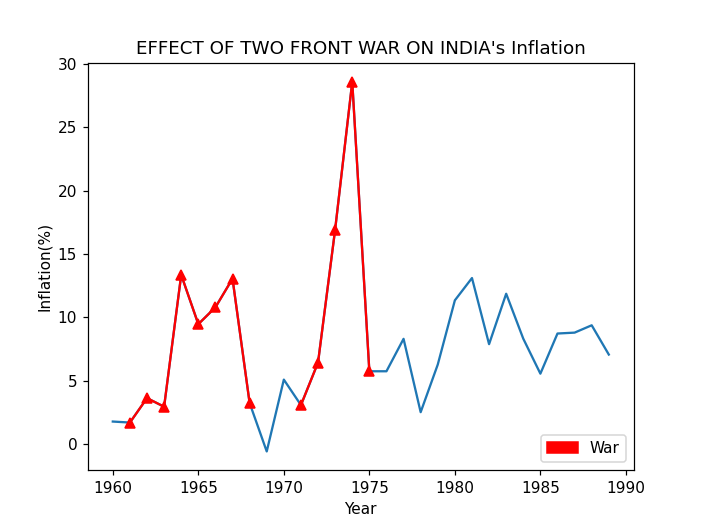

[Text(0, 0.5, 'Inflation(%)'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, "EFFECT OF TWO FRONT WAR ON INDIA's Inflation")]

In [17]:
ii1=df_inflation.loc['India']
ii1=ii1[3:]
def clean(s):
    for x in s.index:
        y=x.split()
        dic[x]=int(y[0])
    s=s.rename(index=dic)
    s=s.replace('..',np.nan)
    s=s.astype('float')
    s=s.sort_index().round(2)
    return s
ii1=clean(ii1)
ii1=ii1[:30].replace(-7.63,np.nan).fillna(method='pad')
war1=ii1[1:9]
war2=ii1[11:16]
fig1,ax1=plt.subplots()
ax1.plot(ii1.index,ii1,war1.index,war1,'-^r',war2.index,war2,'-^r')
red = mpatches.Patch(color='red', label='War')
ax1.legend(handles=[red],loc=4)
ax1.set(title="EFFECT OF TWO FRONT WAR ON INDIA's Inflation",xlabel='Year',ylabel='Inflation(%)')


1960     1.78
1961     1.70
1962     3.63
1963     2.95
1964    13.36
1965     9.47
1966    10.80
1967    13.06
1968     3.24
1969    -0.58
1970     5.09
1971     3.08
1972     6.44
1973    16.94
1974    28.60
1975     5.75
1976     0.00
1977     8.31
1978     2.52
1979     6.28
1980    11.35
1981    13.11
1982     7.89
1983    11.87
1984     8.32
1985     5.56
1986     8.73
1987     8.80
1988     9.38
1989     7.07
Name: India, dtype: float64